In [ ]:
simport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS105/FINAL/Dataset/data_cleaned.csv')

## Thống kê cơ bản

In [ ]:
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")
missing_data = df.isnull().sum()
print("Dữ liệu thiếu:")
print(missing_data)

print(df.dtypes)
description = df.describe()
print("Thống kê mô tả:")
description



Số dòng: 1916
Số cột: 24
Dữ liệu thiếu:
Name                 0
Link Product         0
Store                0
Type                 0
Author Name          0
Short Description    0
Publisher            0
Translators          0
Categories           0
Width                0
Length               0
Height               0
Product ID           0
Price                0
Original Price       0
Discount             0
Discount Rate        0
Rating               0
Review Count         0
Quantity Sold        0
Number of page       0
Range Price          0
Publication Date     0
Publication Year     0
dtype: int64
Name                  object
Link Product          object
Store                 object
Type                  object
Author Name           object
Short Description     object
Publisher             object
Translators           object
Categories            object
Width                float64
Length               float64
Height               float64
Product ID             int64
Price             

,Width,Length,Height,Product ID,Price,Original Price,Discount,Discount Rate,Rating,Review Count,Quantity Sold,Number of page,Publication Year
count,1916.000000,1916.000000,1916.000000,1.916000e+03,1.916000e+03,1.916000e+03,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000
mean,15.120042,21.222860,0.097704,1.507035e+08,1.231184e+05,1.568408e+05,33722.395616,20.134656,4.389979,157.037056,1370.416976,408.578840,2021.006263
std,10.117014,8.472332,1.134774,9.202299e+07,1.002786e+05,1.254203e+05,36644.433310,12.092189,1.479180,465.082421,4476.859897,2808.392068,1.876601
min,0.000000,0.000000,0.000000,3.473340e+05,1.900000e+03,2.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2001.000000
25%,13.000000,20.000000,0.000000,6.858176e+07,6.800000e+04,8.800000e+04,9575.000000,12.000000,4.800000,4.000000,69.750000,227.500000,2020.000000
50%,14.000000,20.500000,0.000000,1.686108e+08,1.010500e+05,1.290000e+05,26400.000000,22.000000,5.000000,24.500000,257.000000,342.000000,2021.000000
75%,15.500000,23.000000,0.000000,2.474436e+08,1.490000e+05,1.950000e+05,46000.000000,29.000000,5.000000,99.250000,934.000000,408.578840,2022.000000
max,277.000000,224.000000,25.000000,2.723548e+08,1.400000e+06,1.750000e+06,403000.000000,70.000000,5.000000,7087.000000,79536.000000,123000.000000,2023.000000


##**1. EDA**

## **1.1. Phân tích tổng quan (Short Analysis)**

In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def convert_categorical_var(df):
  le = LabelEncoder()

  categorical_var = ['Store', 'Type', 'Author Name','Publisher',
       'Translators', 'Categories', 'Range Price']

  for col in categorical_var:
    df[col] = le.fit_transform(df[col])
  return df


df1 = convert_categorical_var(df1)
df1.head()

,Name,Link Product,Store,Type,Author Name,Short Description,Publisher,Translators,Categories,Width,...,Original Price,Discount,Discount Rate,Rating,Review Count,Quantity Sold,Number of page,Range Price,Publication Date,Publication Year
0,Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...,https://tiki.vn/ke-toan-via-he-thuc-hanh-bao-c...,35,1,953,BIẾN KẾ TOÁN KHÔ KHAN TRỞ THÀNH TRÒ CHƠI CON T...,63,516,99,13.0,...,199000,30000,15,5.0,111,5990.0,268.0,3,2023-09-22 00:00:00,2023.0
1,Mùa hè không tên (Nguyễn Nhật Ánh) - Tặng kèm ...,https://tiki.vn/mua-he-khong-ten-nguyen-nhat-a...,141,0,631,“Mùa hè không tên” là truyện dài mới nhất của ...,118,553,120,13.0,...,130000,21000,16,4.8,141,1715.0,292.0,2,2023-09-22 00:00:00,2023.0
2,Không Diệt Không Sinh Đừng Sợ Hãi (TB5),https://tiki.vn/khong-diet-khong-sinh-dung-so-...,141,1,867,Nhiều người trong chúng ta tin rằng cuộc đời c...,164,553,101,14.0,...,110000,34000,31,5.0,1481,21867.0,224.0,1,2022-06-01 00:00:00,2022.0
3,Cây Cam Ngọt Của Tôi,https://tiki.vn/cay-cam-ngot-cua-toi-p74021317...,86,1,428,“Vị chua chát của cái nghèo hòa trộn với vị ng...,148,271,98,14.0,...,108000,32400,30,5.0,614,4435.0,244.0,1,2019-03-01 00:00:00,2019.0
4,Nghệ Thuật Tư Duy Chiến Lược,https://tiki.vn/nghe-thuat-tu-duy-chien-luoc-p...,86,1,73,Có phải những người chiến thắng các chương trì...,5,172,98,16.0,...,239000,64500,27,3.5,2,108.0,560.0,3,2019-03-01 00:00:00,2019.0


### **1.1.1. Correlation Matrix**

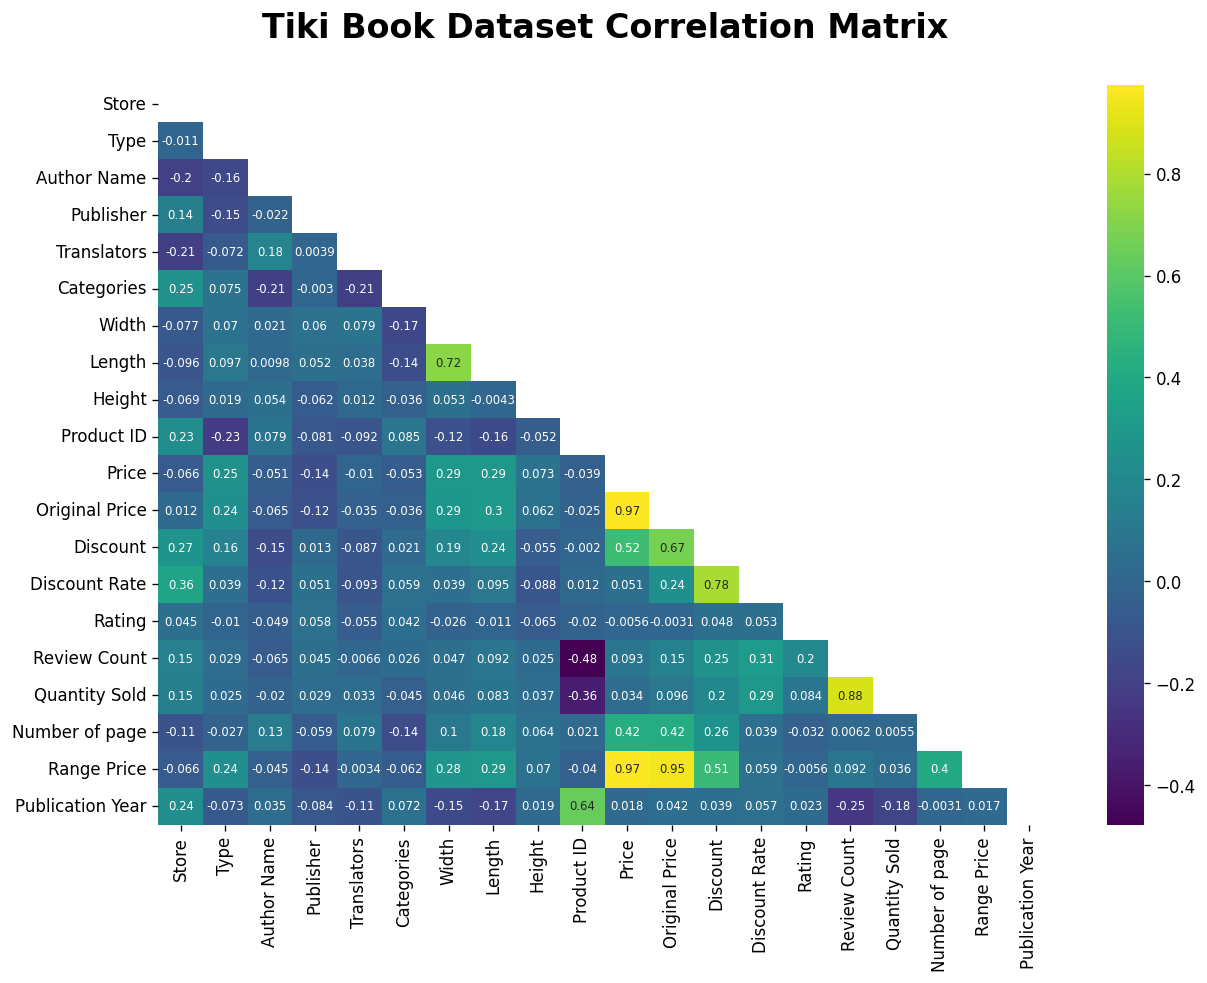

In [ ]:
def heatmap(dataset, label = None):
    corr = dataset.corr(method = 'spearman')
    plt.figure(figsize = (12, 8), dpi = 120)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 20, weight = 'bold')
    plt.show()

heatmap(df1, 'Tiki Book')

Nhận xét:


*   Ba cặp biến có độ tương quan cao nhất là 'Price' và 'Range Price', 'Price' và 'Original Price', 'Original Price' và 'Range Price' vì đều thể hiện giá sản phẩm.
*   Cặp biến tương quan xếp sau những cặp trên là 'Review Count' và 'Quantity Sold', chứng tỏ càng có nhiều lượt mua thì càng có nhiều lượt bình luận.




### **1.1.2. Central Tendency**

In [ ]:
df1.describe()

,Store,Type,Author Name,Publisher,Translators,Categories,Width,Length,Height,Product ID,Price,Original Price,Discount,Discount Rate,Rating,Review Count,Quantity Sold,Number of page,Range Price,Publication Year
count,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1.916000e+03,1.916000e+03,1.916000e+03,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000
mean,107.598643,0.884134,611.029749,110.041754,445.143528,85.769311,15.120042,21.222860,0.097704,1.507035e+08,1.231184e+05,1.568408e+05,33722.395616,20.134656,4.389979,157.037056,1370.416976,408.578840,1.727035,2021.006263
std,41.188824,0.320148,316.738819,59.460133,170.140258,31.338779,10.117014,8.472332,1.134774,9.202299e+07,1.002786e+05,1.254203e+05,36644.433310,12.092189,1.479180,465.082421,4476.859897,2808.392068,1.220846,1.876601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.473340e+05,1.900000e+03,2.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,2001.000000
25%,86.000000,1.000000,332.750000,71.750000,355.000000,66.000000,13.000000,20.000000,0.000000,6.858176e+07,6.800000e+04,8.800000e+04,9575.000000,12.000000,4.800000,4.000000,69.750000,227.500000,1.000000,2020.000000
50%,139.000000,1.000000,653.500000,118.000000,553.000000,98.000000,14.000000,20.500000,0.000000,1.686108e+08,1.010500e+05,1.290000e+05,26400.000000,22.000000,5.000000,24.500000,257.000000,342.000000,2.000000,2021.000000
75%,141.000000,1.000000,953.000000,150.000000,553.000000,101.000000,15.500000,23.000000,0.000000,2.474436e+08,1.490000e+05,1.950000e+05,46000.000000,29.000000,5.000000,99.250000,934.000000,408.578840,2.000000,2022.000000
max,173.000000,1.000000,1049.000000,212.000000,618.000000,140.000000,277.000000,224.000000,25.000000,2.723548e+08,1.400000e+06,1.750000e+06,403000.000000,70.000000,5.000000,7087.000000,79536.000000,123000.000000,4.000000,2023.000000


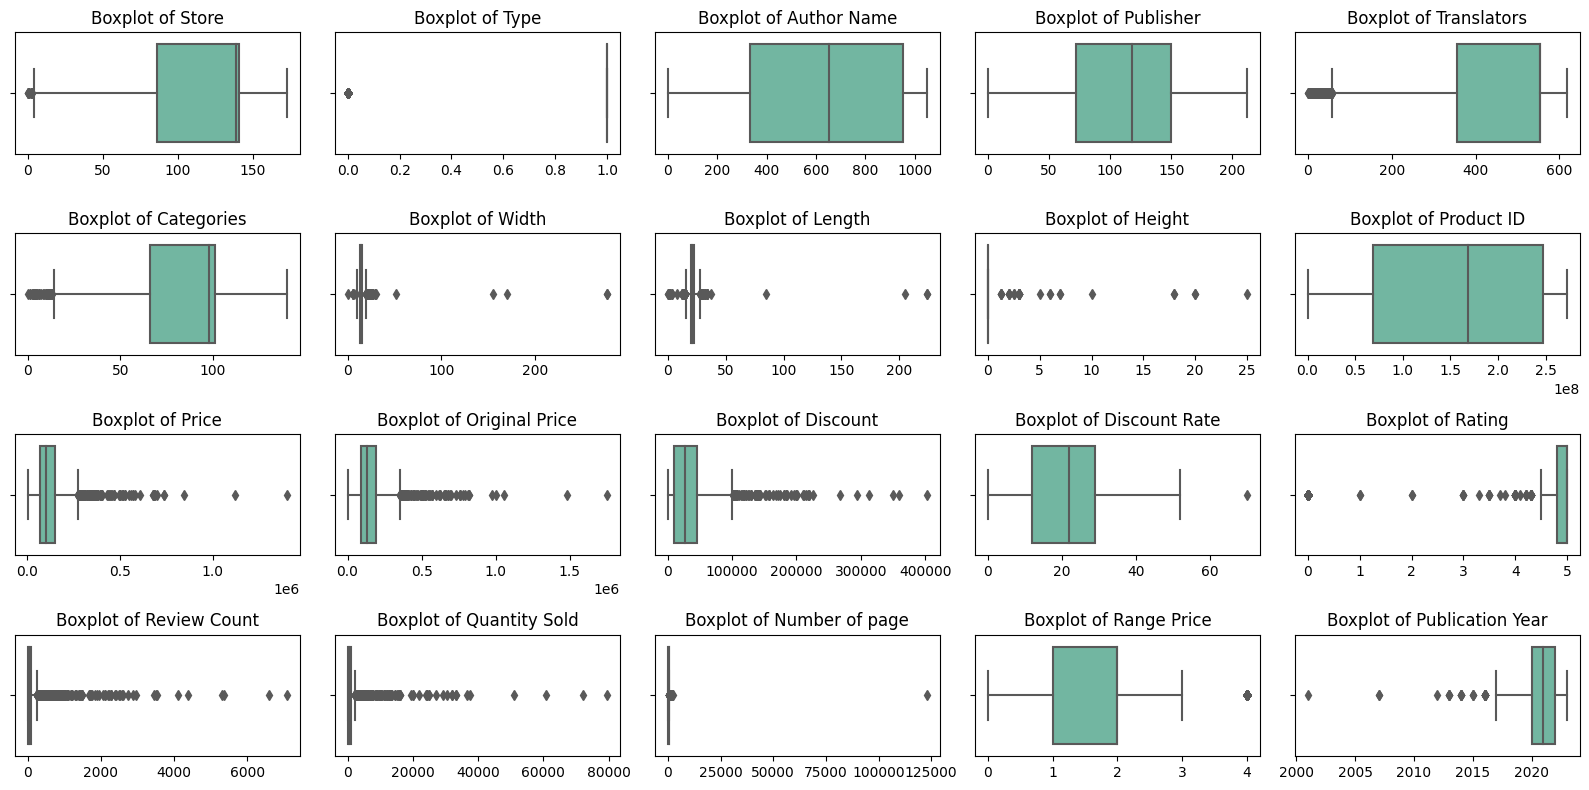

In [ ]:

numerical_columns = df1._get_numeric_data()

num_plots = len(numerical_columns.columns)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=numerical_columns[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(None)

for i in range(num_plots, len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()



1.   Các biến trong biểu đồ đa số có giá trị ngoại lệ.
2.   Đồ thị của biến 'Original Price', 'Discount Rate' và 'Discount' đang ở trạng thái Positively Skewed.
3.   Đối với biến Rating: giá trị dao động từ khoảng 4.8 đến 5, có giá trị trung vị trùng với giá trị lớn nhất và Negatively Skewed.
4.   Đối với biến Review Count: đồ thị thể hiện Positively Skewed với giá trị ngoại lệ đông đúc.
5.   Đối với biến Quantity Sold đang ở mức Positively Skewed.
6.   Đối với biến Number of page có đồ thị ở Positively Skewed \\
==> Để nhìn thấy được độ lệch rõ nét hơn của các biến đồ thị histplot sẽ được vẽ ở bên dưới.

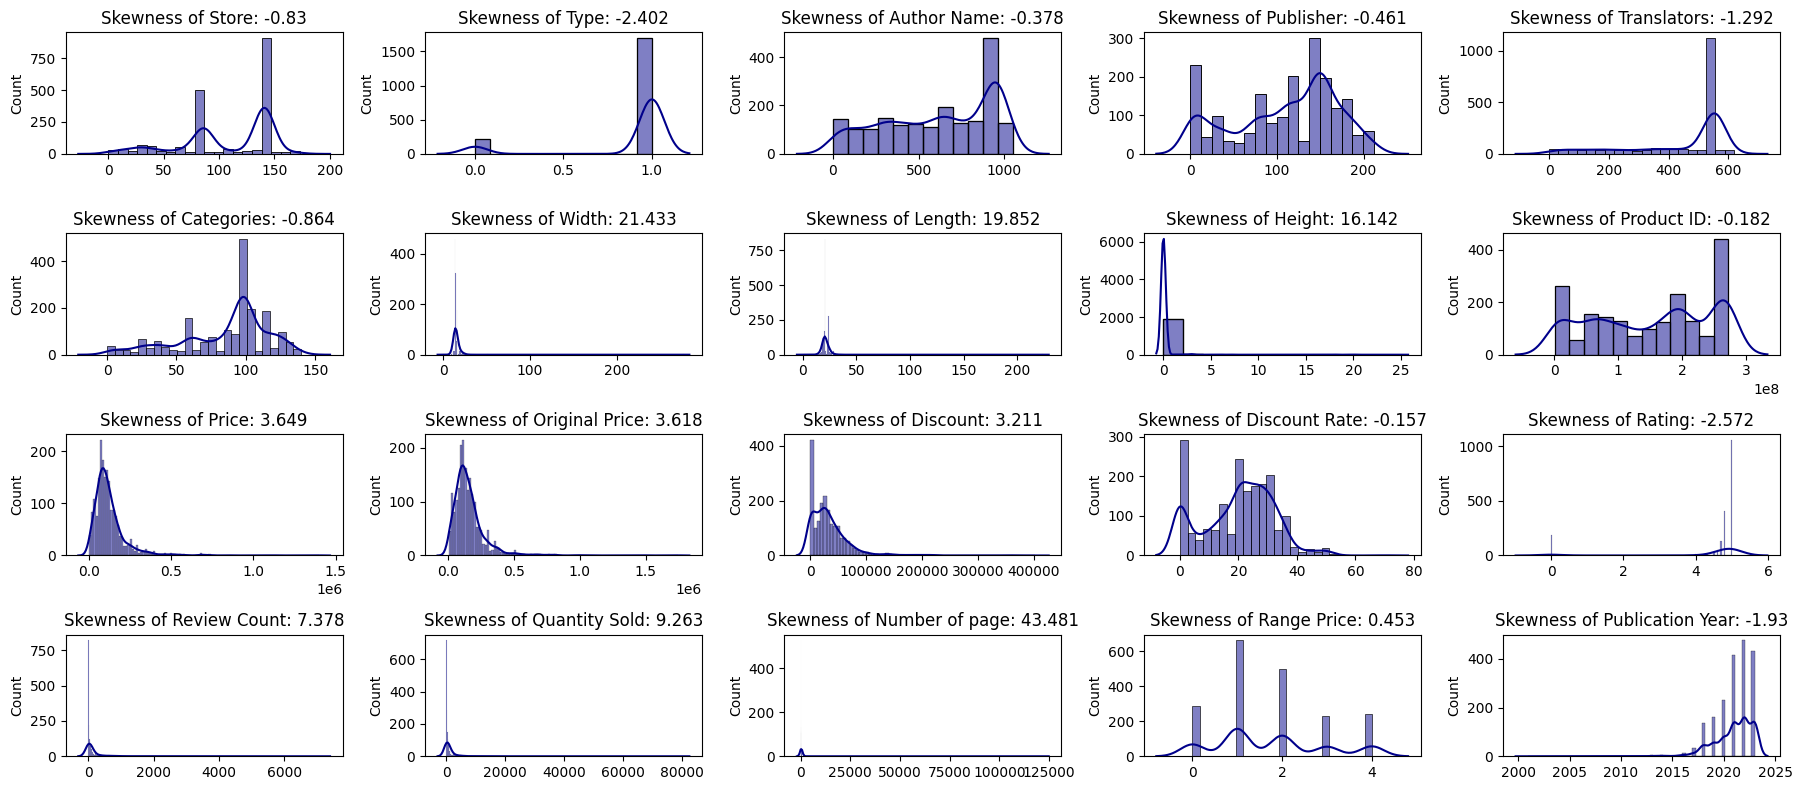

In [ ]:
num_plots = len(numerical_columns.columns)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.histplot(df1[col], kde=True, color='darkblue', kde_kws=dict(cut=3), ax=axes[i])
    skew_value = round(df1[col].skew(), 3)
    axes[i].set_title(f'Skewness of {col}: {skew_value}')
    axes[i].set_xlabel(None)

for i in range(num_plots, len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()


### **1.1.3. Distribution of 'Price', 'Original Price', 'Discount', 'Discount Rate'**

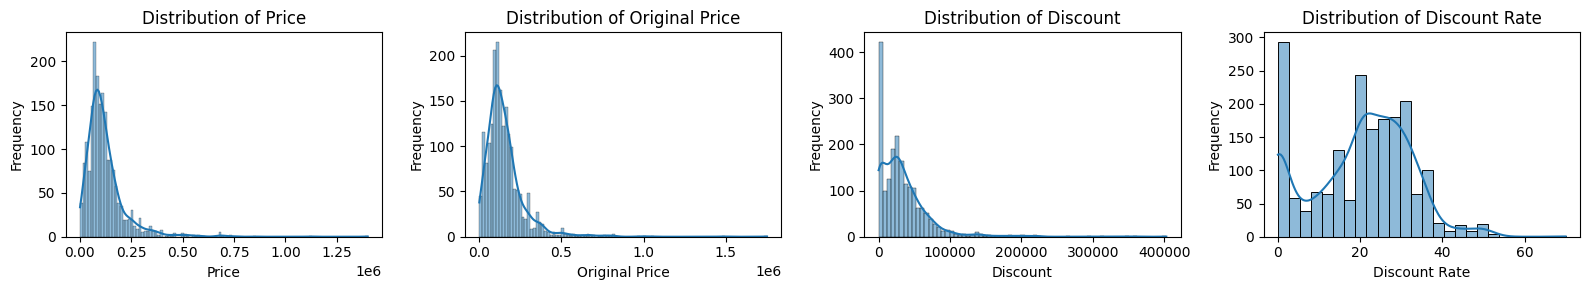

In [ ]:
columns_to_plot = ['Price', 'Original Price', 'Discount', 'Discount Rate']

plt.figure(figsize=(16, 3))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Nhận xét:


*   Biểu đồ phân bố của Price, Original Price có hình dạng hơi giống nhau
*   Biểu đồ phân bố của Discout và Discount Rate có hình dạng tương tự nhau



## **1.2. Phân tích sâu (Deep Insight Analysis)**

In [ ]:
df2 = df.copy()

### **Q1: Thống kê số lượng Nhà xuất bản(Publisher), số cửa hàng (Store), số thể loại (Categories), số sản phẩm (Product ID), số tác giả (Author Name) trên Nhà sách Tiki**

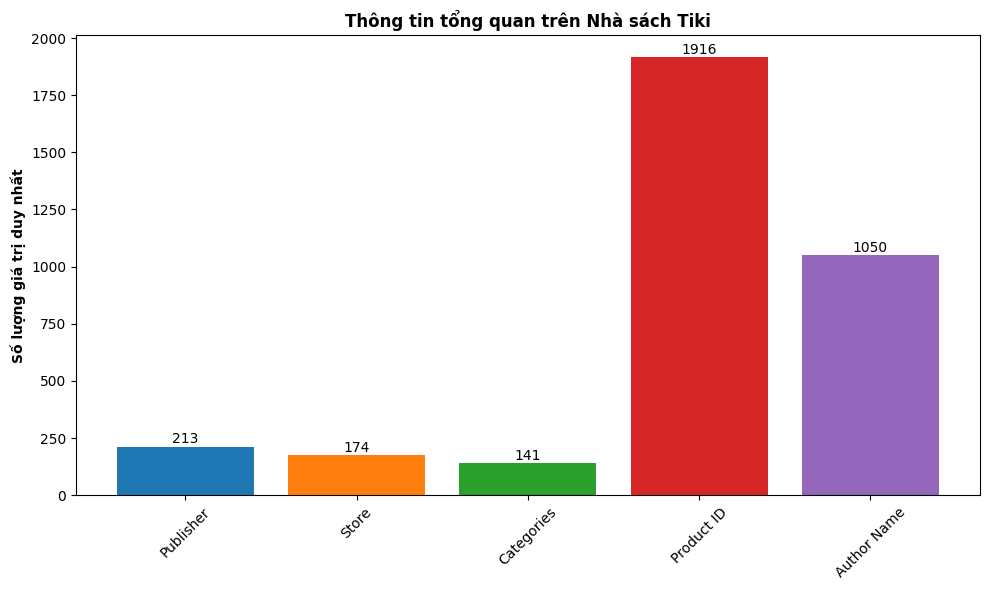

In [ ]:

unique_values_counts = [
    df2['Publisher'].nunique(),
    df2['Store'].nunique(),
    df2['Categories'].nunique(),
    df2['Product ID'].nunique(),
    df2['Author Name'].nunique()
]

columns = ['Publisher', 'Store', 'Categories', 'Product ID', 'Author Name']
colors = plt.cm.tab10(np.arange(len(columns)))

plt.figure(figsize=(10, 6))
bars = plt.bar(columns, unique_values_counts, color=colors)
plt.title('Thông tin tổng quan trên Nhà sách Tiki', fontweight='bold')
# plt.xlabel('', fontweight='bold')
plt.ylabel('Số lượng giá trị duy nhất', fontweight='bold')
plt.xticks(rotation=45)

for bar, value in zip(bars, unique_values_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, value, ha='center', va='bottom')

plt.tight_layout()
plt.show()



**Thông tin tổng quan**
*   Số lượng nhà xuất bản: 213
*   Số lượng cửa hàng phân phối sản phẩm: 174
*   Số lượng thể loại sách: 141
*   Số lượng sản phẩm: 1916
*   Số lượng tác giả: 1050







## 1.2.1. Đánh giá và phân tích các khía cạnh về Nhà xuất bản (Publisher) trên Nhà sách Tiki

### Q2: Top 15 nhà xuất bản nổi bật nhất trên Nhà sách Tiki?

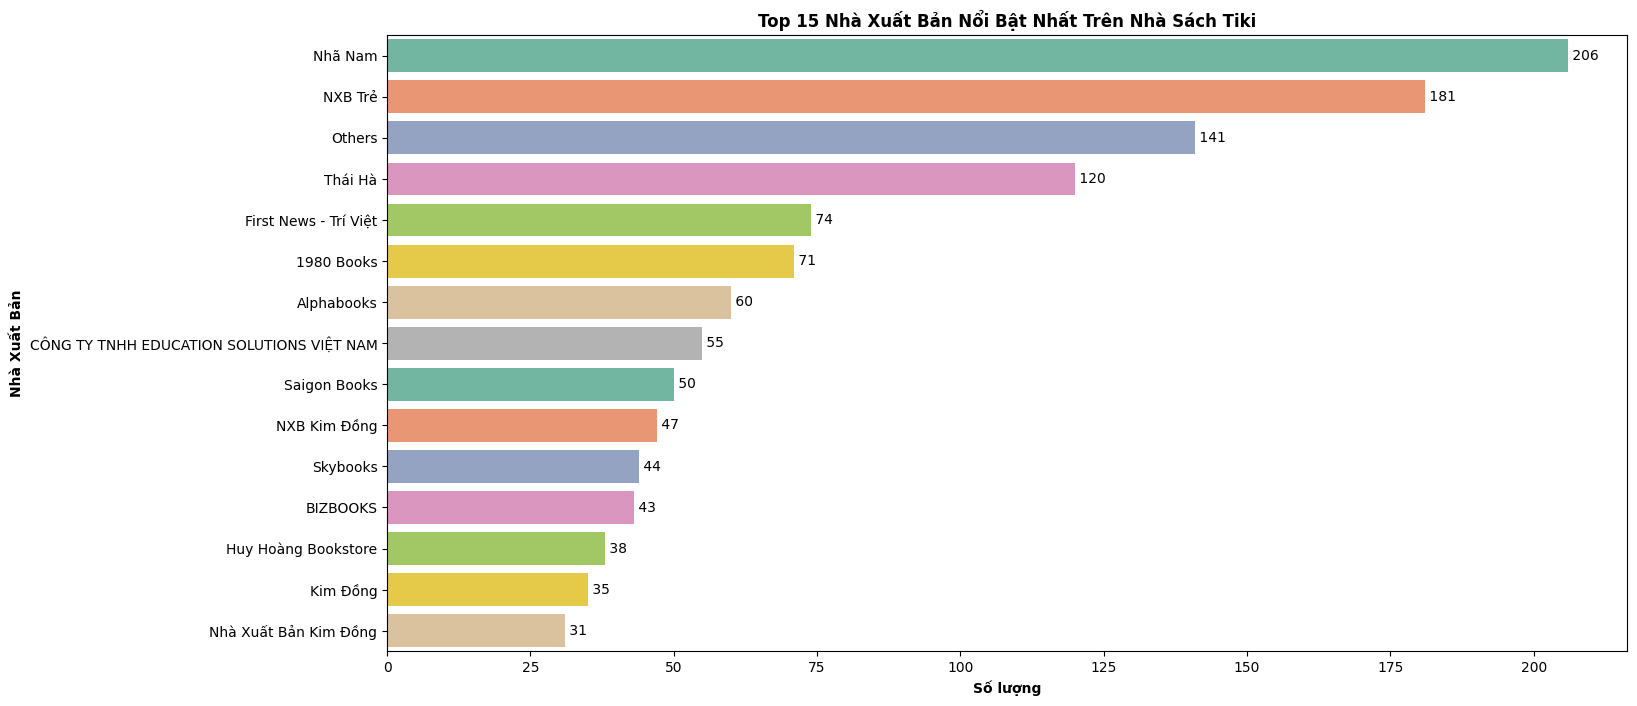

In [ ]:
import random
top_publishers = df['Publisher'].value_counts().head(15).sort_values(ascending=False)
palette = 'Set2'
plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=top_publishers.values, y=top_publishers.index, palette=palette)

for i, val in enumerate(top_publishers.values):
    barplot.text(val, i, f' {val}', ha='left', va='center', color='black')

plt.title('Top 15 Nhà Xuất Bản Nổi Bật Nhất Trên Nhà Sách Tiki', fontweight='bold')
plt.xlabel('Số lượng', fontweight='bold')
plt.ylabel('Nhà Xuất Bản', fontweight='bold')
plt.show()



Nhận xét:
*   Dựa vào thống kê tần suất, ta thấy 2 nhà xuất bản nổi bật nhất trên Nhà sách Tiki là 'Nhã Nam' và 'NXB Trẻ' chiếm thị phần lớn nhất.



### Q3: Đối với 2 nhà xuất bản chiếm thị phần lớn nhất trên Nhà sách Tiki là 'Nhã Nam' và 'NXB Trẻ' có đặc trưng riêng về thể loại sách (Categories) mà họ xuất bản không?

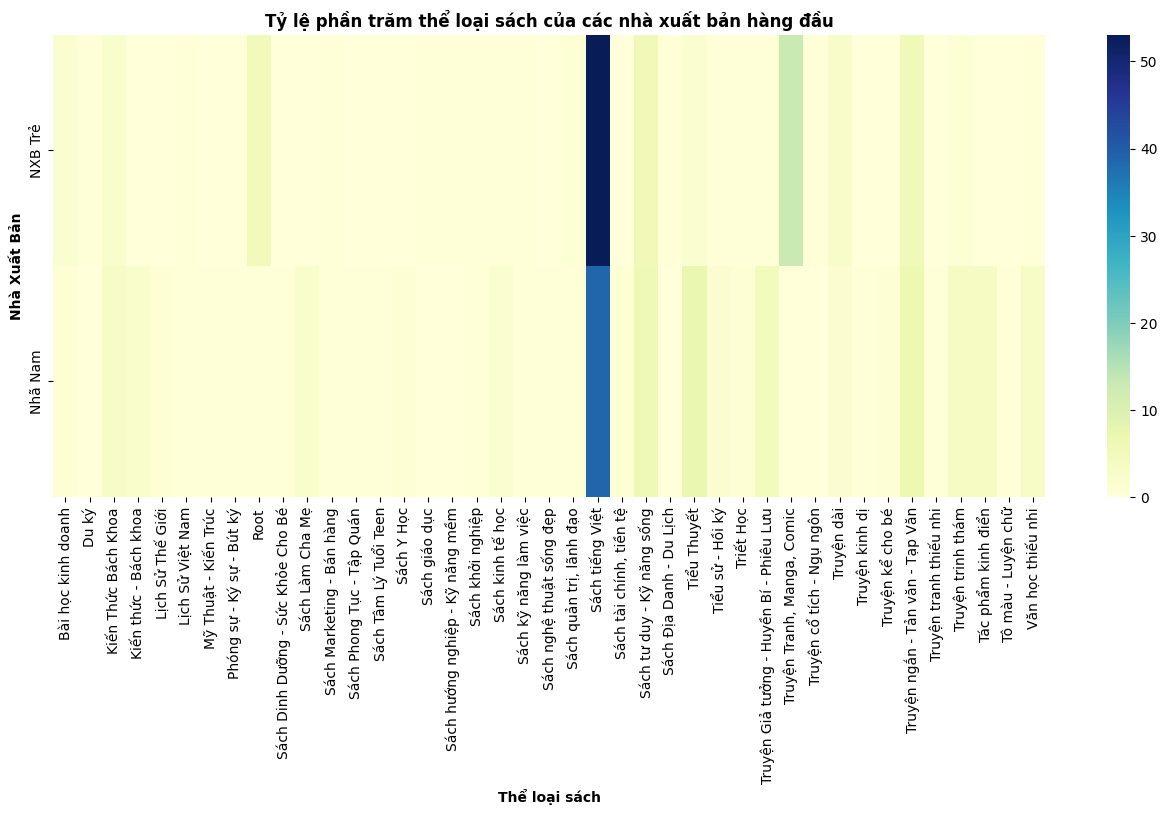

In [ ]:
top_publishers = df2['Publisher'].value_counts().head(2).index
top_publishers_data = df2[df2['Publisher'].isin(top_publishers)]

publisher_genre = top_publishers_data.groupby(['Publisher', 'Categories']).size().unstack(fill_value=0)
publisher_genre_percentage = publisher_genre.div(publisher_genre.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 6))
sns.heatmap(publisher_genre_percentage, cmap='YlGnBu')
plt.title('Tỷ lệ phần trăm thể loại sách của các nhà xuất bản hàng đầu', fontweight='bold')
plt.xlabel('Thể loại sách', fontweight='bold')
plt.ylabel('Nhà Xuất Bản', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

Nhận xét:

*   Cả 'Nhã Nam' và 'NXB Trẻ' đều tập trung vào xuất bản thể loại 'Sách tiếng Việt' chiếm tỉ lệ từ khoảng 40-50%.
*   Ngoài ra cả 2 nhà xuất bản vẫn đảm bảo tính đa dạng về thể loại sách xuất bản.



### Q4: Số lượng sản phẩm bán ra của các nhà xuất bản hàng đầu? Đánh giá xem các nhà xuất bản đứng đầu về số lượng sản phẩm bán ra (Quantity Sold) có phải là nhà xuất bản đứng đầu về số lượng sản phẩm mà họ chiếm thị phần lớn trên Nhà sách Tiki đã đánh giá ở Q2 không?

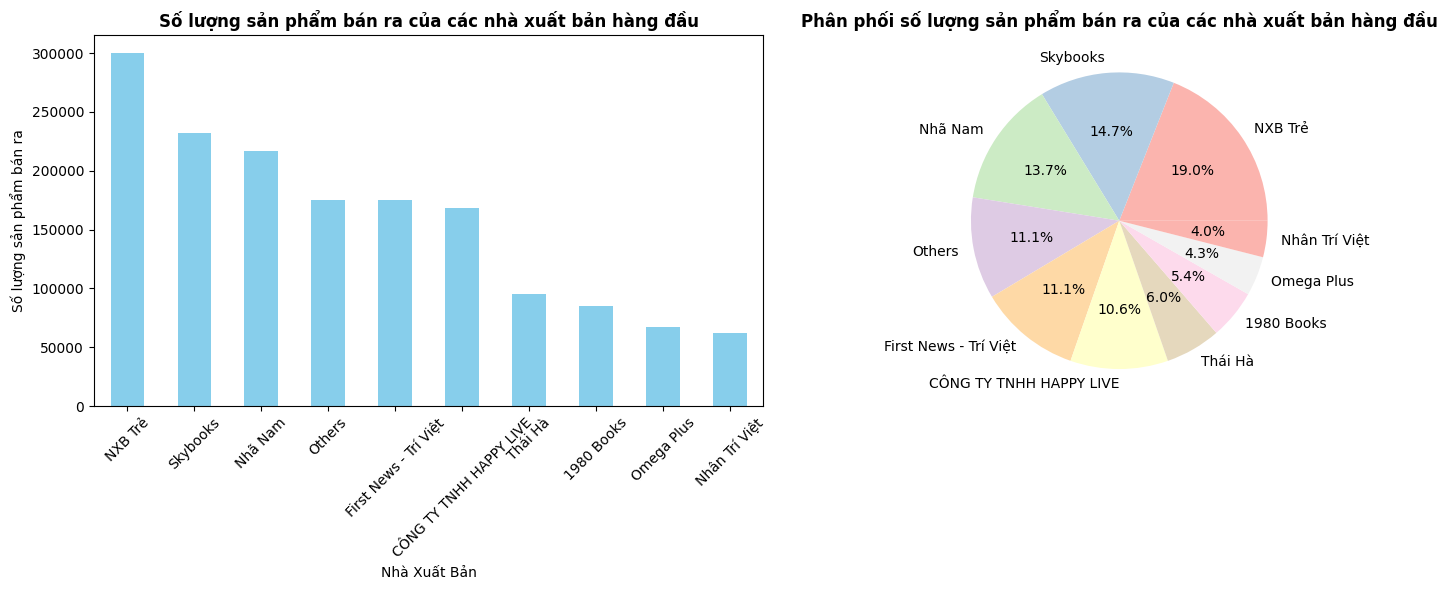

In [ ]:
products_sold_by_publisher = df2.groupby('Publisher')['Quantity Sold'].sum().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


products_sold_by_publisher.head(10).plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Số lượng sản phẩm bán ra của các nhà xuất bản hàng đầu', fontweight='bold')
axes[0].set_xlabel('Nhà Xuất Bản')
axes[0].set_ylabel('Số lượng sản phẩm bán ra')
axes[0].tick_params(axis='x', rotation=45)


axes[1].pie(products_sold_by_publisher.head(10), labels=products_sold_by_publisher.head(10).index, autopct='%1.1f%%', colors=sns.color_palette('Pastel1', 10))
axes[1].set_title('Phân phối số lượng sản phẩm bán ra của các nhà xuất bản hàng đầu', fontweight='bold')

plt.tight_layout()
plt.show()


Nhận xét:
*   Đứng đầu về số lượng sản phẩm bán ra lần lượt là 'NXB Trẻ' với 19%, 'Skybooks' với 14.7%, 'Nhã Nam' với 13.7%.
*   Ở Q2, đứng đầu về thị phần là 'Nhã Nam', sau đó là 'NXB Trẻ'. Mặc dù đứng đầu về thị phần nhưng 'Nhã Nam' vẫn thua về số lượng sản phẩm bán ra so với 'NXB Trẻ' và 'Skybooks'
*   'Skybooks' không chiếm thị phần lớn nhưng vấn đứng top 2 về số lượng sản phẩm đã bán.



## 1.2.2. Đánh giá và phân tích các khía cạnh về Cửa hàng phân phối (Store) trên Nhà sách Tiki

### Q5: Top 10 cửa hàng phân phối nổi bật nhất?

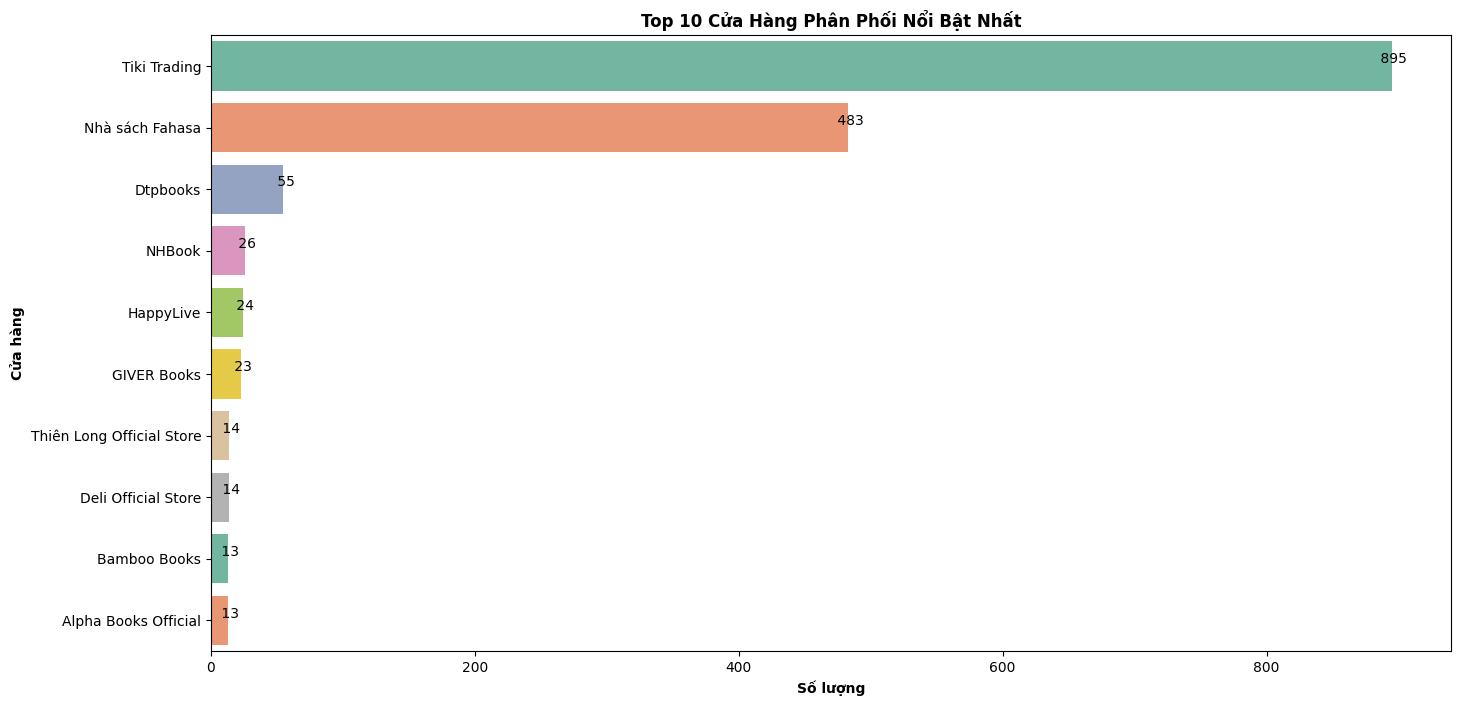

In [ ]:
top_stores = df['Store'].value_counts().head(10).sort_values(ascending=False)
colors = sns.color_palette('Set2', len(top_stores))

plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=top_stores.values, y=top_stores.index, palette=colors)

for i, val in enumerate(top_stores.values):
    barplot.text(val, i, f' {val}', ha='center', va='bottom', color='black')

plt.title('Top 10 Cửa Hàng Phân Phối Nổi Bật Nhất', fontweight='bold')
plt.xlabel('Số lượng', fontweight='bold')
plt.ylabel('Cửa hàng', fontweight='bold')
plt.show()


Nhận xét:
*   Hai cửa hàng chiếm thị phần phân phối sản phẩm lớn nhất trên Nhà sách Tiki là 'Tiki Trading' và 'Nhà sách Fahasa'



### Q6: Top 10 cửa hàng có số lượng sản phẩm đã bán cao nhất? Các cửa hàng có số lượng sản phẩm bán ra cao nhất có phải là các cửa hàng chiếm thị phần phân phối sản phẩm lớn nhất đã phân tích ở Q5 hay không?

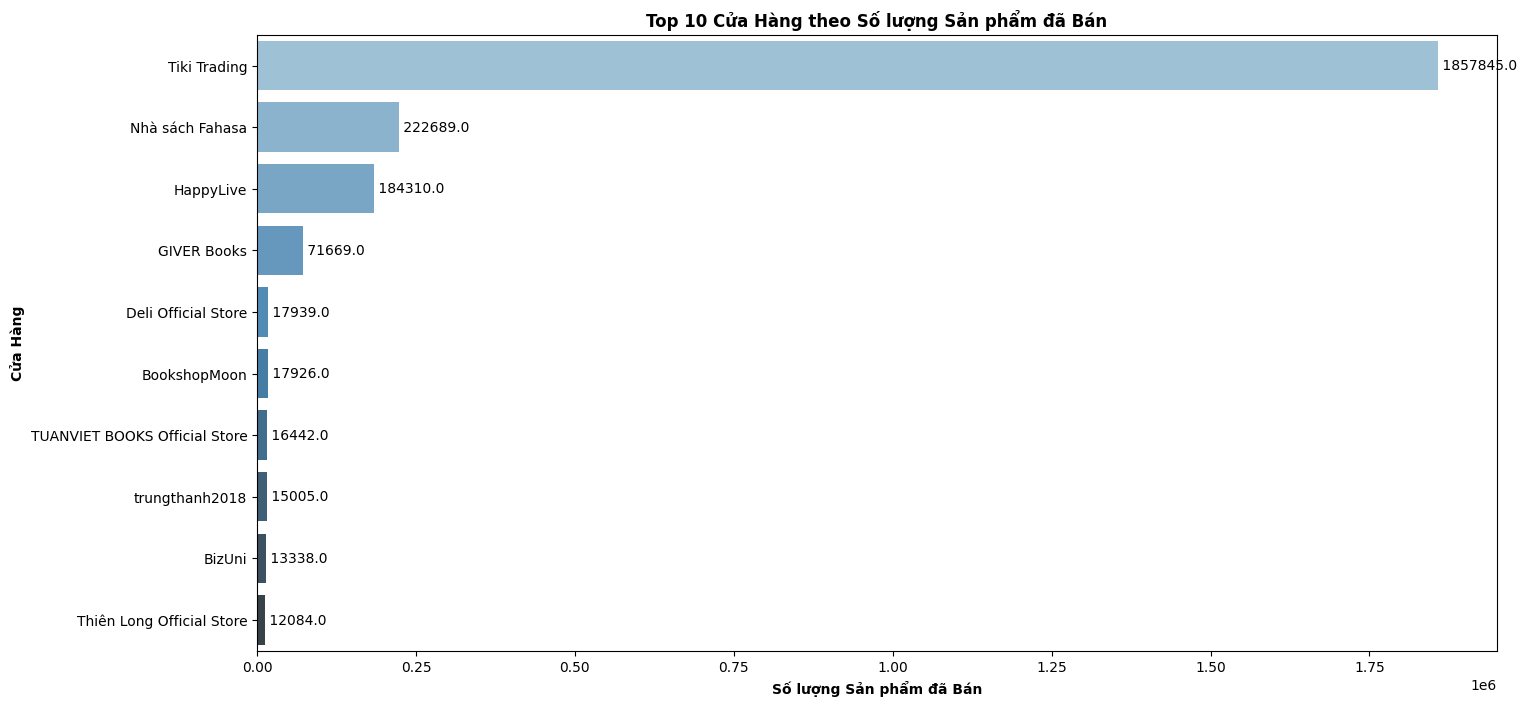

In [ ]:
products_sold_by_store = df2.groupby('Store')['Quantity Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=products_sold_by_store.head(10).values, y=products_sold_by_store.head(10).index, palette='Blues_d')

for i, val in enumerate(products_sold_by_store.head(10).values):
    plt.text(val, i, f' {val}', ha='left', va='center', color='black')

plt.title('Top 10 Cửa Hàng theo Số lượng Sản phẩm đã Bán', fontweight='bold')
plt.xlabel('Số lượng Sản phẩm đã Bán', fontweight='bold')
plt.ylabel('Cửa Hàng', fontweight='bold')
plt.show()


Nhận xét:
*   Đứng đầu về số lượng sản phẩm đã bán(Quantity Sold) là hai cửa hàng 'Tiki Trading' và 'Nhà sách Fahasa'.
*   Hai cửa hàng đứng đầu đều là hai cửa hàng nổi bật top đầu trên Nhà sách Tiki đã phân tích ở Q5. Có thể đánh giá tổng quan là cửa hàng chiếm thị phần phân phối sản phẩm lớn thì cũng tỉ lệ thuận với số lượng sản phẩm bán ra.



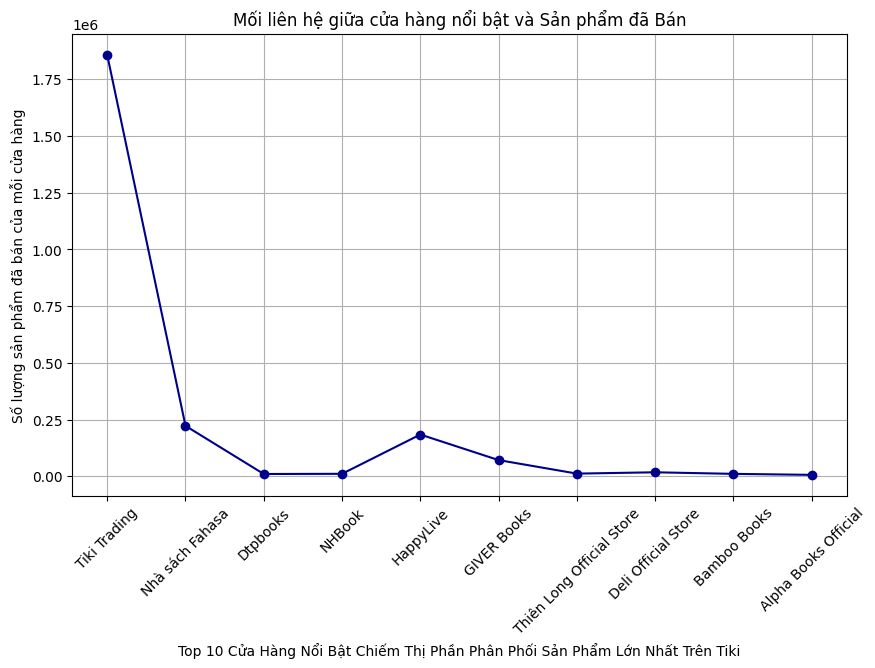

In [ ]:
# Chứng minh cho nhận định 'Có thể đánh giá tổng quan là cửa hàng chiếm thị phần phân phối sản phẩm lớn thì cũng tỉ lệ thuận với số lượng sản phẩm bán ra.'
top_stores = df2['Store'].value_counts().head(10).index.tolist()
products_sold_by_store = df2.groupby('Store')['Quantity Sold'].sum().sort_values(ascending=False)

top_stores_sales = products_sold_by_store.loc[top_stores]

plt.figure(figsize=(10, 6))
plt.plot(top_stores, top_stores_sales, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Top 10 Cửa Hàng Nổi Bật Chiếm Thị Phần Phân Phối Sản Phẩm Lớn Nhất Trên Tiki')
plt.ylabel('Số lượng sản phẩm đã bán của mỗi cửa hàng')
plt.title('Mối liên hệ giữa cửa hàng nổi bật và Sản phẩm đã Bán')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Q7: Các cửa hàng có doanh số bán hàng cao nhất?

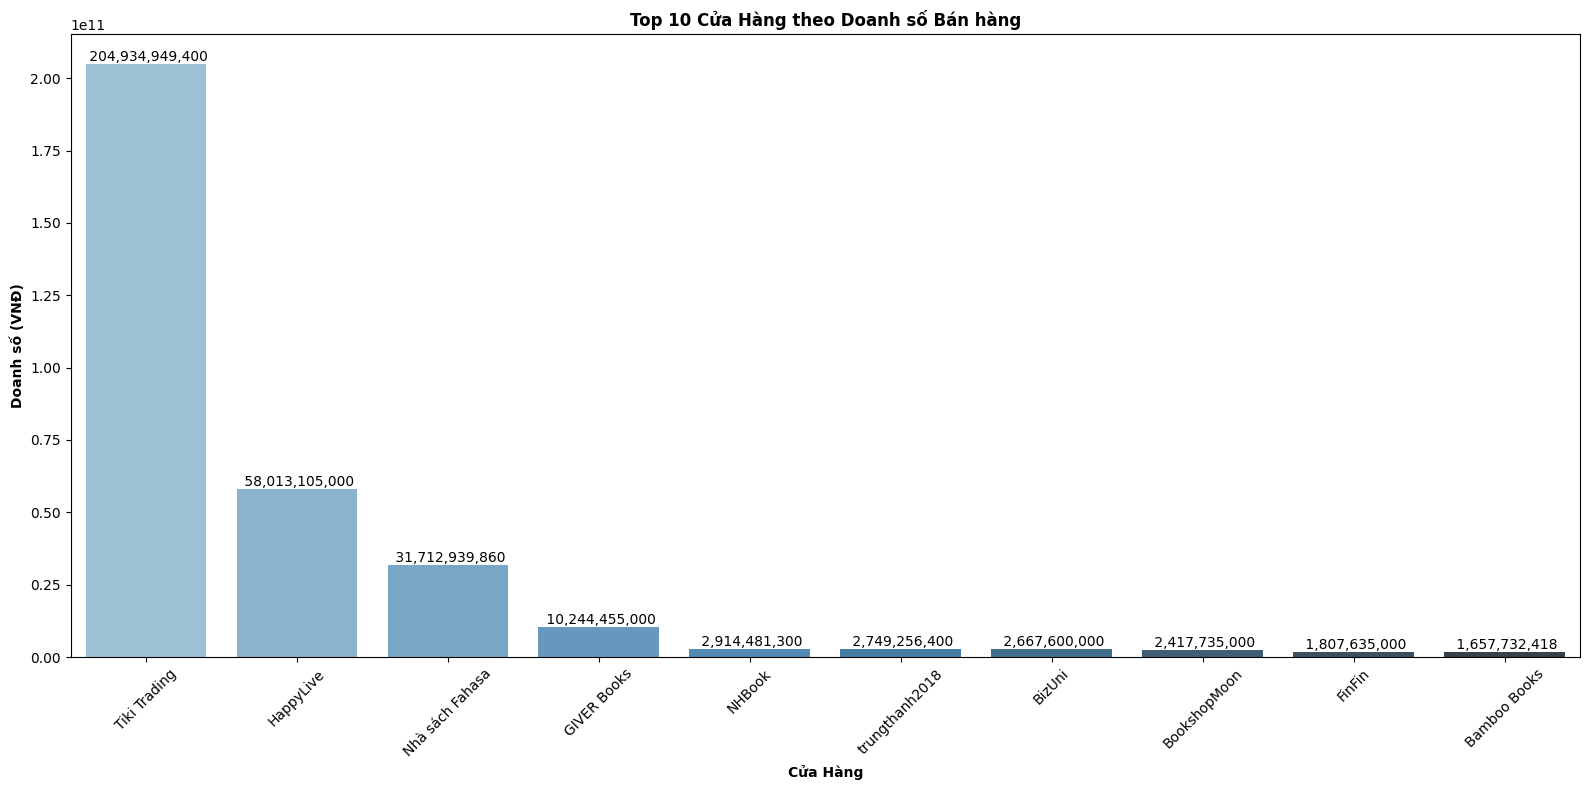

In [ ]:
df2['Total Sales'] = df2['Price'] * df2['Quantity Sold']
total_sales_by_store = df2.groupby('Store')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
barplot = sns.barplot(x=total_sales_by_store.head(10).index, y=total_sales_by_store.head(10), palette='Blues_d')

for i, val in enumerate(total_sales_by_store.head(10)):
    barplot.text(i, val, f' {val:,.0f}', ha='center', va='bottom', color='black')

plt.title('Top 10 Cửa Hàng theo Doanh số Bán hàng', fontweight='bold')
plt.xlabel('Cửa Hàng', fontweight='bold')
plt.ylabel('Doanh số (VNĐ)', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận xét:
*   Doanh số bán hàng lớn nhất vẫn là Tiki Trading, theo sau là HappyLive và Nhà sách Fahasa.



### Q8: Các cửa hàng có lượt Review cao nhất và rating trung bình của các cửa hàng đó?

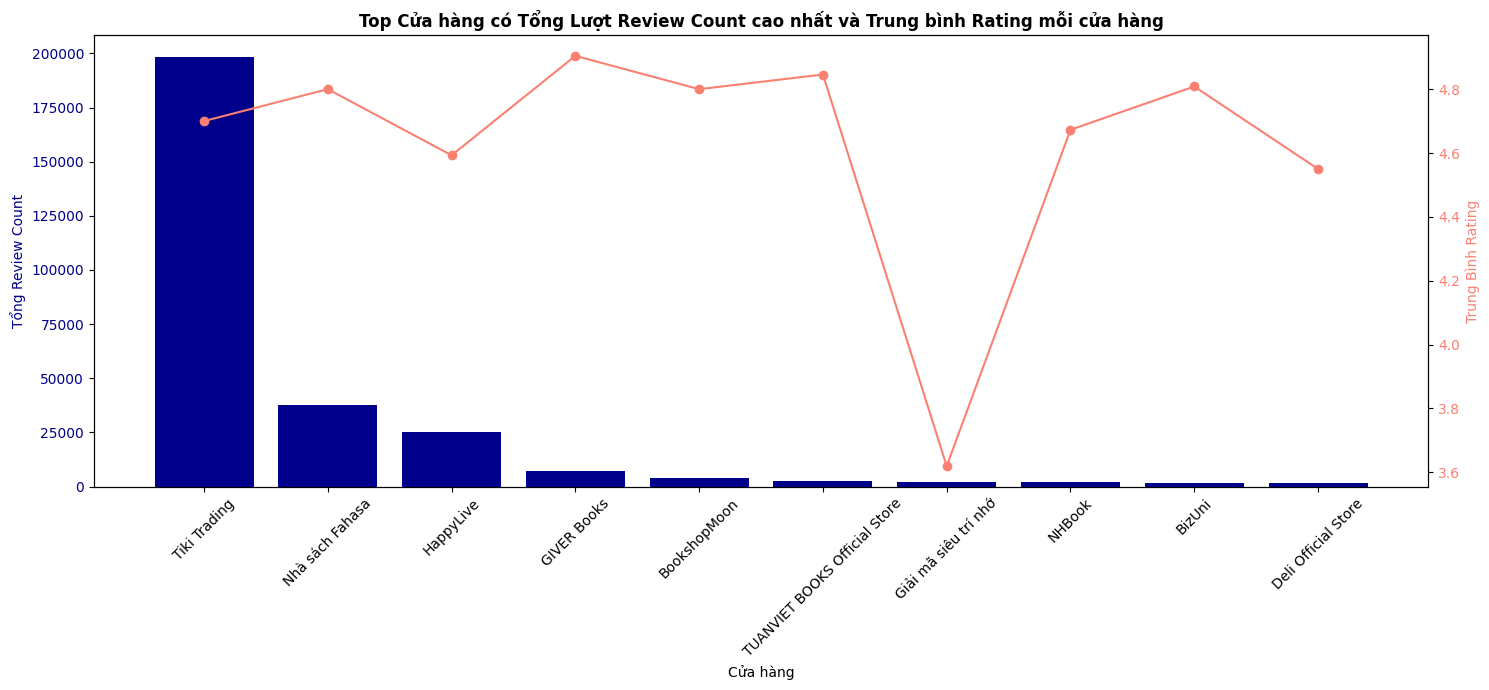

In [ ]:
review_count_by_store = df2.groupby('Store')['Review Count'].sum().sort_values(ascending=False)
top_review_count_stores = review_count_by_store.head(10)

top_review_count_store_data = df2[df2['Store'].isin(top_review_count_stores.index)]

avg_rating_top_review_count_stores = top_review_count_store_data.groupby('Store')['Rating'].mean()

fig, ax1 = plt.subplots(figsize=(15, 7))


# Biểu đồ cột cho tổng Review Count
color = 'darkblue'
ax1.set_xlabel('Cửa hàng')
ax1.set_ylabel('Tổng Review Count', color=color)
ax1.bar(top_review_count_stores.index, top_review_count_stores, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_review_count_stores.index, rotation=45)
ax1.set_title('Top Cửa hàng có Tổng Lượt Review Count cao nhất và Trung bình Rating mỗi cửa hàng', fontweight='bold', color='black')

# Tạo một twin axis cho biểu đồ đường trung bình Rating
ax2 = ax1.twinx()
color = 'salmon'
ax2.set_ylabel('Trung Bình Rating', color=color)
ax2.plot(avg_rating_top_review_count_stores.index, avg_rating_top_review_count_stores, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


#### **Kết luận về phân tích cửa hàng: 'Tiki Trading' là cửa hàng lớn nhất, nổi bật nhất, số lượng sản phẩm đa dạng, doanh thu cao nhất trên Nhà Sách Tiki.**

## 1.2.3. Đánh giá và phân tích các khía cạnh về Sản phẩm trên Nhà sách Tiki

### Q9: Những sản phẩm hiện bán chạy nhất trên Nhà sách Tiki?

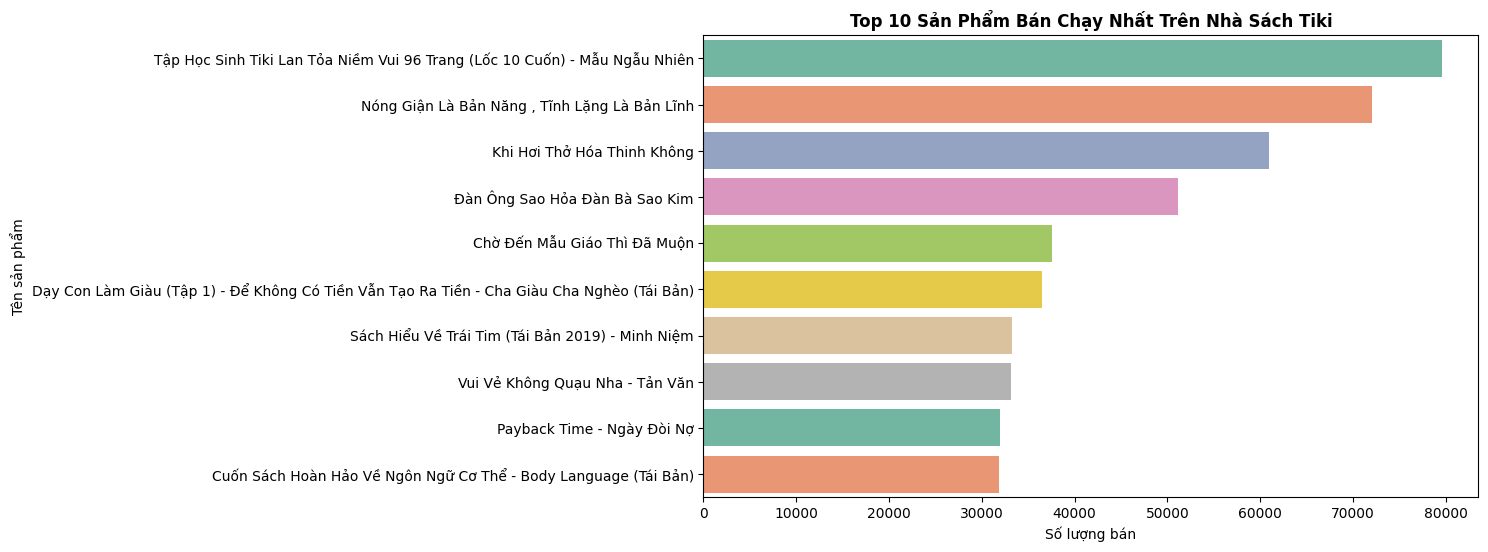

In [ ]:
top_products = df2.groupby('Name')['Quantity Sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Set2')
plt.title('Top 10 Sản Phẩm Bán Chạy Nhất Trên Nhà Sách Tiki', fontweight = 'bold')
plt.xlabel('Số lượng bán')
plt.ylabel('Tên sản phẩm')
plt.show()


Nhận xét:


*   Sách bán chạy nhất đạt ở ngưỡng đỉnh điểm gần 80000.

### Q10: Trên Nhà Sách Tiki, các tác giả nào bán được nhiều sản phẩm nhất?

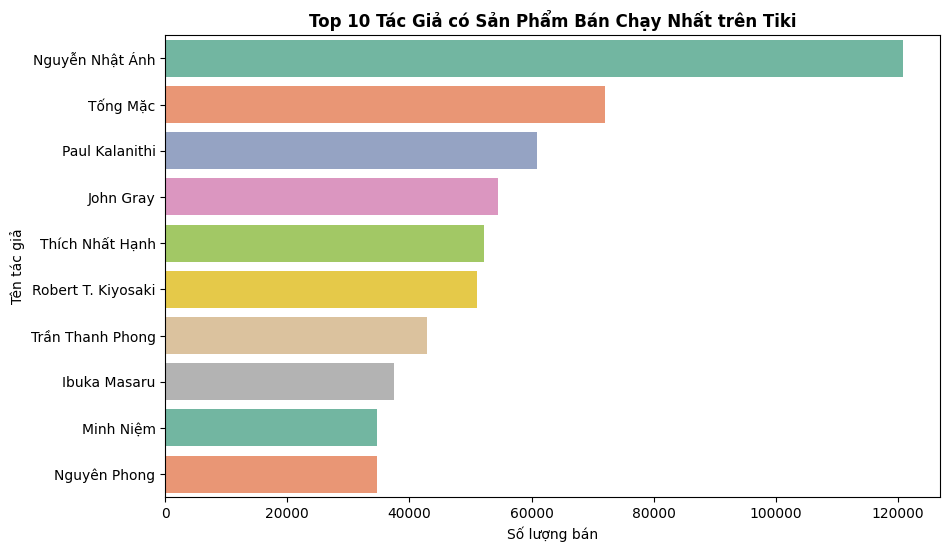

In [ ]:
top_authors = df2.groupby('Author Name')['Quantity Sold'].sum().sort_values(ascending=False)[1:].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='Set2')
plt.title('Top 10 Tác Giả có Sản Phẩm Bán Chạy Nhất trên Tiki',fontweight = 'bold')
plt.xlabel('Số lượng bán')
plt.ylabel('Tên tác giả')
plt.show()


Nhận xét:


*   Tác giả Nguyễn Nhật Ánh có số lượng sách bán vượt trội hơn hẳn các tác giả khác, hơn ít nhất 80000 cuốn. Bán những cuốn sách của tác giả Nguyễn Nhật Ánh có thể giúp tăng số lượng sản phẩm bán ra.





### Q11: Các sản phẩm có nhiều lượt review và rating nhất

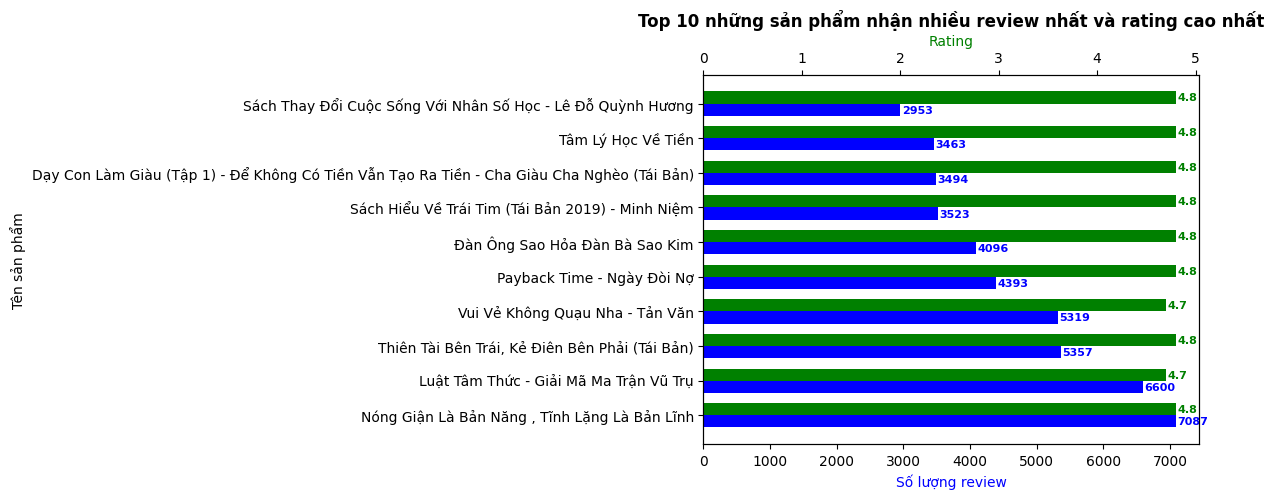

In [ ]:
df_sorted = df2.sort_values(by=['Review Count', 'Rating'], ascending=False)

df_sorted = df_sorted.head(10)
bar_width = 0.35
index = np.arange(len(df_sorted['Name'][:10]))

fig, ax1 = plt.subplots()

bars1 = ax1.barh(index, df_sorted['Review Count'][:10], bar_width, label='Số lượng review', color='blue')
ax2 = ax1.twiny()
bars2 = ax2.barh(index + bar_width, df_sorted['Rating'][:10], bar_width, label='Rating', color='green')

ax1.set_yticks(index + bar_width / 2)
ax1.set_yticklabels(df_sorted['Name'][:10])
ax1.set_ylabel('Tên sản phẩm')
ax1.set_xlabel('Số lượng review', color='blue')
ax2.set_xlabel('Rating', color='green')

for i, v in enumerate(df_sorted['Review Count'][:10]):
    ax1.text(v + 20, i, str(v), color='blue', va='center', fontsize=8, fontweight='bold')

for i, v in enumerate(df_sorted['Rating'][:10]):
    ax2.text(v + 0.02, i + bar_width, str(v), color='green', va='center', fontsize=8, fontweight='bold')

plt.title('Top 10 những sản phẩm nhận nhiều review nhất và rating cao nhất', fontweight='bold')
plt.show()


Nhận xét:


*   'Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh' nhận được nhiều lượt review nhất và được đánh giá 4.8/5




### Q12: Đánh giá về tỉ lệ Rating cho sản phẩm trên Nhà Sách Tiki?

In [ ]:
%%capture
!pip install squarify

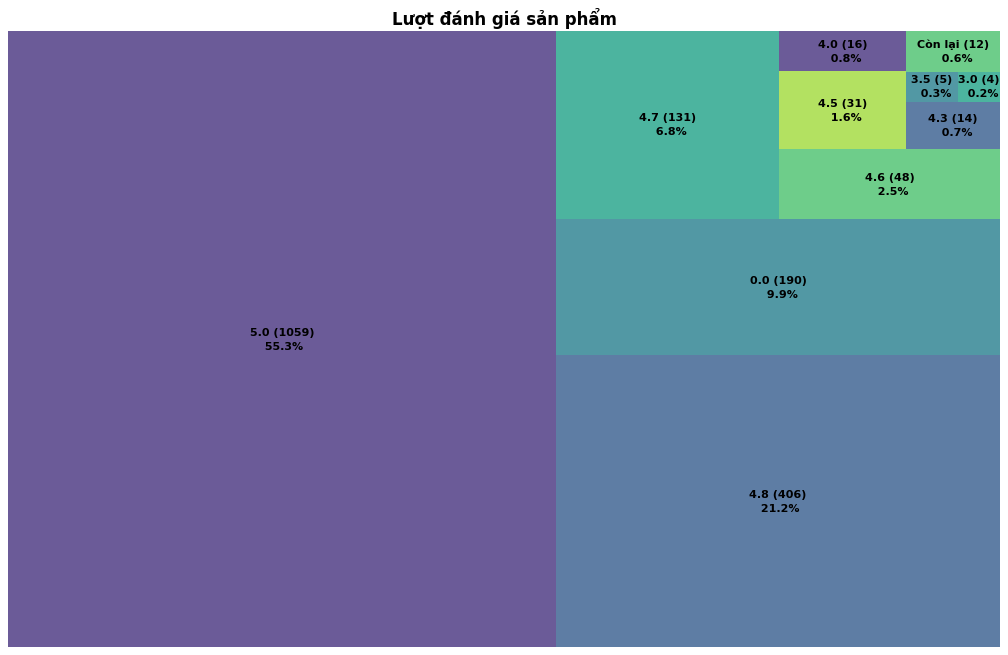

In [ ]:
import squarify
rating=df['Rating'].value_counts().sort_values(ascending=False)
i=0
for ind,val in rating.items():
    rating=rating.rename(index={rating.index[i]: str(ind)})
    i+=1
rating_10=rating[:11]
orthers=rating[10:].values.sum()
rating_10=rating_10.rename(index={rating_10.index[10]: 'Còn lại'})
rating_10[10]=orthers

perc = [str('{:5.1f}%'.format(i/rating_10.values.sum()*100)) for i in rating_10.values]
labels = [el[0] + f' ({el[1]})' "\n" + el[2] for el in zip(rating_10.index, rating_10.values, perc)]
sizes = rating_10.values.tolist()

plt.figure(figsize=(16,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette('viridis'), alpha=.8, text_kwargs={'fontsize':10,'linespacing':1.5,'fontweight':'bold'})

plt.axis('off')
plt.title('Lượt đánh giá sản phẩm',fontsize=15,weight='bold')
plt.show()

Nhận xét:


*   Qua Biểu đồ cho thấy, nhiều sản phẩm trên Tiki có lượt đánh giá khá tốt, chiếm gần 70% cho rating 5 và 4.8



## 1.2.4. Đánh giá phân tích về Tỉ lệ giảm giá sản phẩm (Discount rate) trên Nhà Sách Tiki

### Q13: Đánh giá theo thời gian về Discount Rate, Price, Quantity Sold

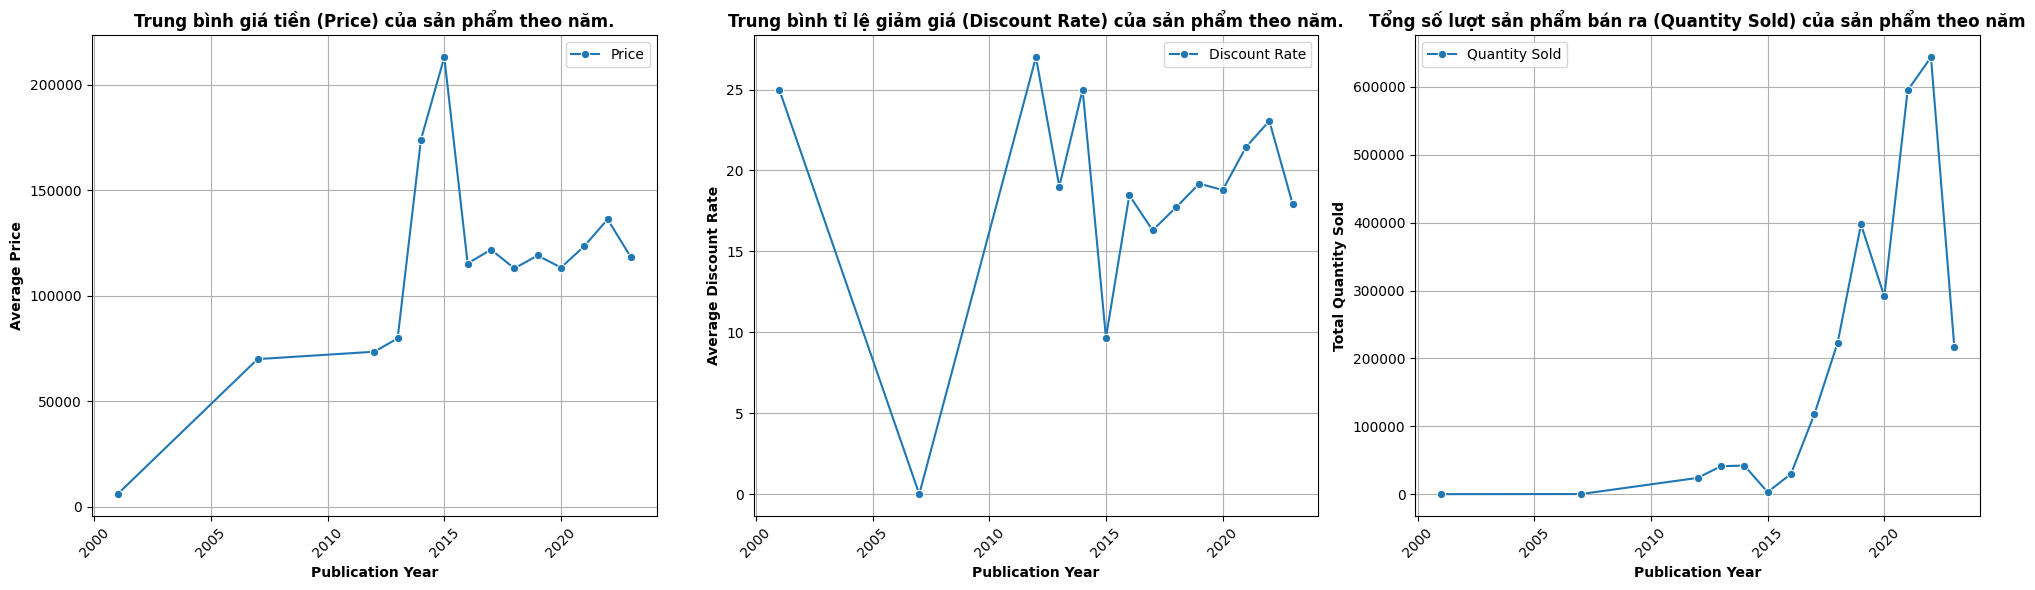

In [ ]:
data_from_2000 = df[df['Publication Year'] >= 2000]
data_list = [
    ('Price', 'Trung bình giá tiền (Price) của sản phẩm theo năm.', 'Average Price'),
    ('Discount Rate', 'Trung bình tỉ lệ giảm giá (Discount Rate) của sản phẩm theo năm.', 'Average Discount Rate'),
    ('Quantity Sold', 'Tổng số lượt sản phẩm bán ra (Quantity Sold) của sản phẩm theo năm', 'Total Quantity Sold')  # Thay đổi tên và tiêu đề
]

plt.figure(figsize=(20, 6))

for i, (column, title, ylabel) in enumerate(data_list, 1):
    plt.subplot(1, 3, i)
    if column == 'Quantity Sold':
        sns.lineplot(x='Publication Year', y=column, data=data_from_2000.groupby('Publication Year')[column].sum().reset_index(), marker='o', label=column)
    else:
        sns.lineplot(x='Publication Year', y=column, data=data_from_2000.groupby('Publication Year')[column].mean().reset_index(), marker='o', label=column)
    plt.title(title, fontweight='bold')
    plt.xlabel('Publication Year', fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()




Nhận xét:


*   Những cuốn sách được xuất bản vào năm 2015 có giá trị tiền cao kỉ lục so với các năm khác và mức giảm giá trung bình ở 10%, chính vì vậy mà số lượt mua vào năm đó lại ở mức thấp nhất là 0.
*   Ở cuốn được xuất bản ở khoảng năm 2022, sách được bán với mức cao nhất đạt đến gần 650000 cuốn với mức giảm giá tầm 23% và giá tiền đạt ở khoảng 100.000
đến 150.000



### Q14: Có sự khác biệt nào về mức độ giảm giá được áp dụng ('Discount Rate') dựa trên các khoảng giảm giá khác nhau không?

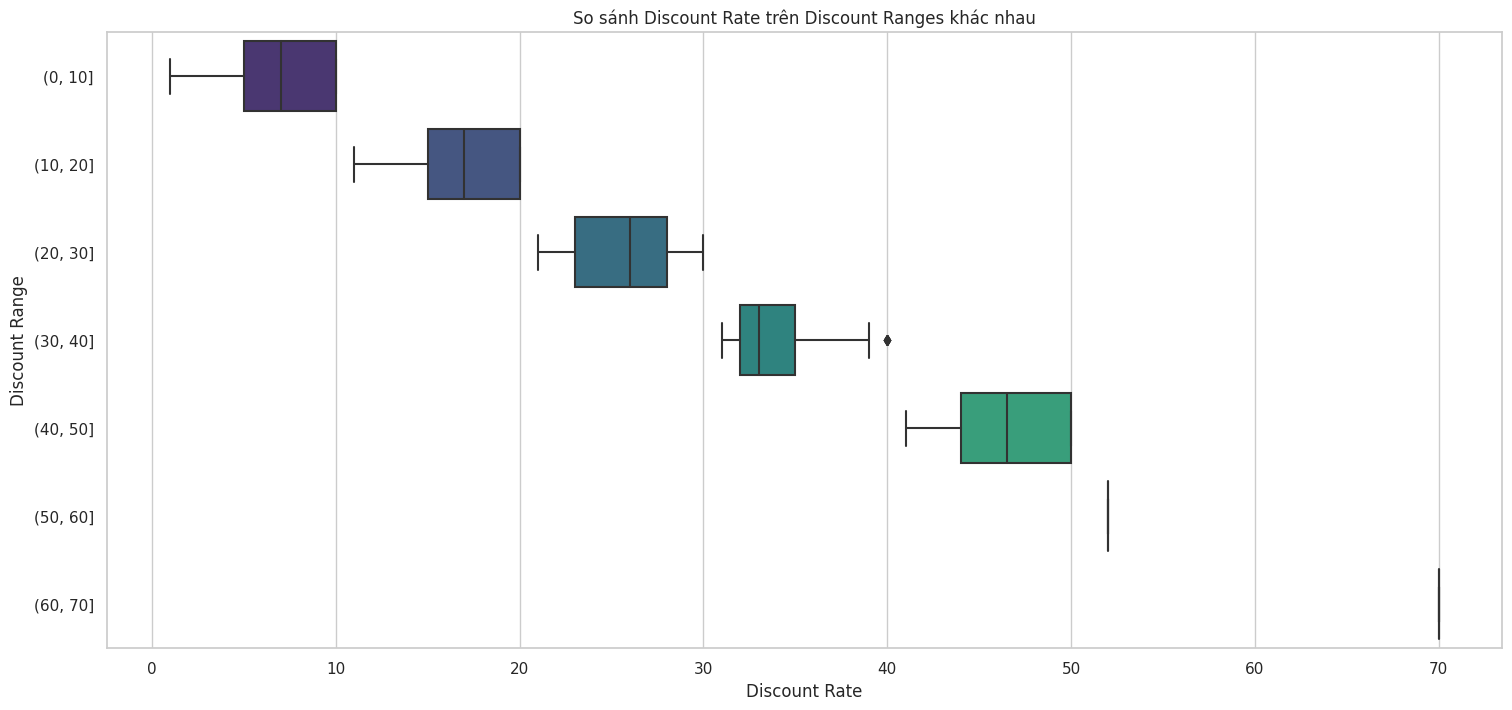

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
df2['Discount Range'] = pd.cut(df2['Discount Rate'], bins=bins)


sns.set(style="whitegrid")

plt.figure(figsize=(18, 8))
sns.boxplot(x='Discount Rate', y='Discount Range', data=df2, palette='viridis')
plt.xlabel('Discount Rate')
plt.ylabel('Discount Range')
plt.title('So sánh Discount Rate trên Discount Ranges khác nhau')
plt.show()


Nhận xét:


*   Phân bố giá trị tỉ lệ giảm giá dưới 50% là chiếm số lượng khá lớn và trên khoảng còn lại rất ít.



### Q15: Top 10 cửa hàng (Store) có trung bình tỉ lệ giảm giá cao nhất?

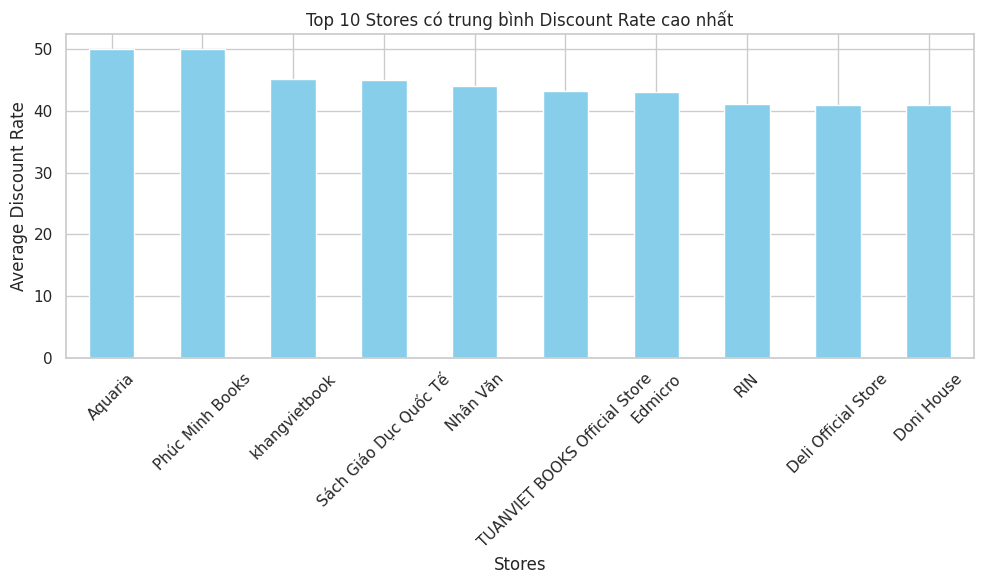

In [ ]:
avg_discount_by_store = df.groupby('Store')['Discount Rate'].mean()

top_10_stores = avg_discount_by_store.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_stores.plot(kind='bar', color='skyblue')
plt.xlabel('Stores')
plt.ylabel('Average Discount Rate')
plt.title('Top 10 Stores có trung bình Discount Rate cao nhất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận xét:


*   Tỉ lệ giảm giá trên 10 cửa hàng có tỉ lệ cao nhất khá đồng đều, không chêch lệch nhau quá 10%


### Q16: Top 10 sản phẩm hiện giảm giá cao nhất trên Nhà sách Tiki?

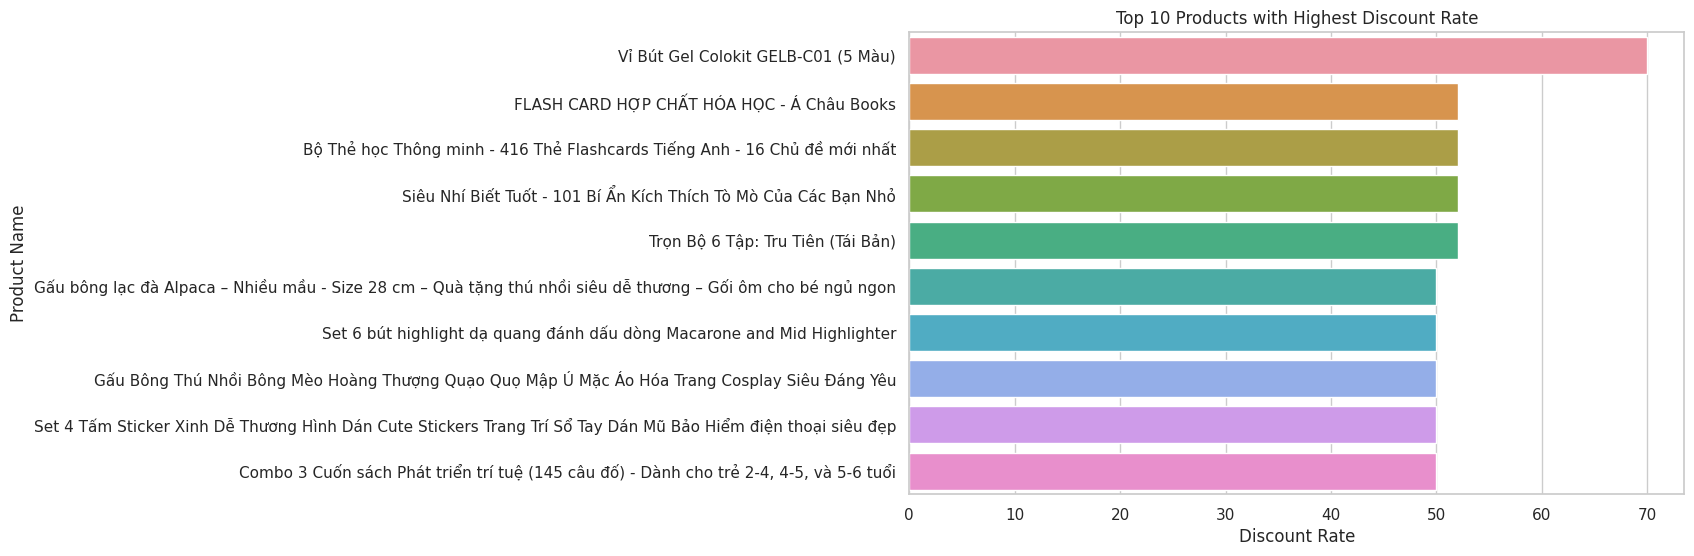

In [ ]:
top_10_products = df.sort_values(by='Discount Rate', ascending=False).head(10)

sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
sns.barplot(x='Discount Rate', y='Name', data=top_10_products)
plt.xlabel('Discount Rate')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Highest Discount Rate')
plt.show()

Nhận xét:


*   Trong 10 sản phẩm có tỉ lệ giảm giá cao nhất, 'Vỉ Bút Gel Colokit GELB-C01(5 Màu) có tỉ lệ giảm cao nhất và vượt trội hơn các sản phẩm còn lại khoảng 20%



### Q17: Lấy ra các thuộc tính có độ tương quan cao với biến 'Discount Rate'

In [ ]:
def find_correlated_features_numeric(df, target):
    df_num_corr = df.corr()[target]
    correlated_features = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
    return list(correlated_features.index)

num_correlated_list = find_correlated_features_numeric(df1, 'Discount Rate')
feature_selected = num_correlated_list[1:]
feature_selected

['Discount',
 'Store',
 'Rating',
 'Original Price',
 'Categories',
 'Quantity Sold',
 'Review Count',
 'Author Name']

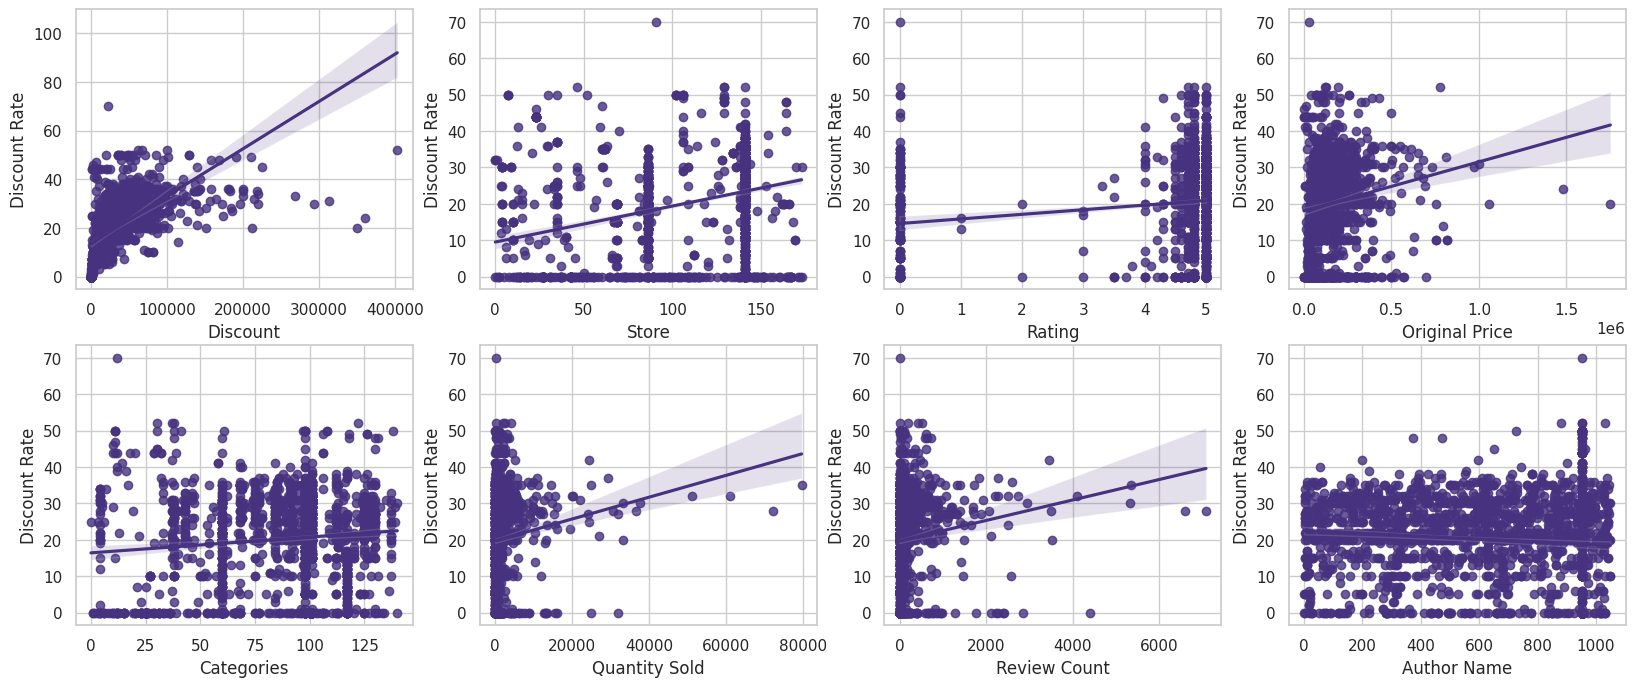

In [ ]:
def show_regression(feature_selected, target, df):
  fig, ax = plt.subplots(round(len(feature_selected) / 4), 4, figsize = (20, 8))

  for i, ax in enumerate(fig.axes):
      if i < len(feature_selected):
          sns.regplot(x=feature_selected[i], y=target, data=df, ax=ax)

show_regression(feature_selected, 'Discount Rate', df1[feature_selected + ['Discount Rate']])

Nhận xét:


*   Trong tất cả các biến tương quan với 'Discount Rate', Biến 'Discount' tương quan nhất và hầu hết các biến đều tương quan thuận.

